In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm, trange

pd.set_option('display.max_rows', 80)
pd.set_option('display.width', 1920)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
np.random.seed(42)
plt.rcParams['figure.dpi'] = 150

In [9]:
df = pd.read_csv('./normalized_nybnb.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14672 entries, 0 to 14671
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Listings Count             14672 non-null  float64
 1   Host Total Listings Count       14672 non-null  float64
 2   Calculated host listings count  14672 non-null  float64
 3   Latitude                        14672 non-null  float64
 4   Longitude                       14672 non-null  float64
 5   Accommodates                    14672 non-null  float64
 6   Bathrooms                       14672 non-null  float64
 7   Bedrooms                        14672 non-null  float64
 8   Beds                            14672 non-null  float64
 9   Price                           14672 non-null  float64
 10  Weekly Price                    14672 non-null  float64
 11  Monthly Price                   14672 non-null  float64
 12  Security Deposit                

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             balanced_accuracy_score, classification_report,
                             confusion_matrix)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['High Review Score']), df['High Review Score'], test_size=0.1, random_state=42)
target_names = ['Low Review Score', 'High Review Score']

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Logistic Regression": LogisticRegression(solver="liblinear", multi_class="ovr"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    
}

for name, cls in classifiers.items():
    cls.fit(X_train, y_train)


Logistic Regression
Accuracy :  0.635558583106267
Balanced Accuracy :  0.6251388870548776
[[585 242]
 [293 348]]
                   precision    recall  f1-score   support

 Low Review Score       0.67      0.71      0.69       827
High Review Score       0.59      0.54      0.57       641

         accuracy                           0.64      1468
        macro avg       0.63      0.63      0.63      1468
     weighted avg       0.63      0.64      0.63      1468

KNN
Accuracy :  0.6049046321525886
Balanced Accuracy :  0.5953005713940771
[[555 272]
 [308 333]]
                   precision    recall  f1-score   support

 Low Review Score       0.64      0.67      0.66       827
High Review Score       0.55      0.52      0.53       641

         accuracy                           0.60      1468
        macro avg       0.60      0.60      0.60      1468
     weighted avg       0.60      0.60      0.60      1468

Decision Tree
Accuracy :  0.5633514986376021
Balanced Accuracy :  0.5612272

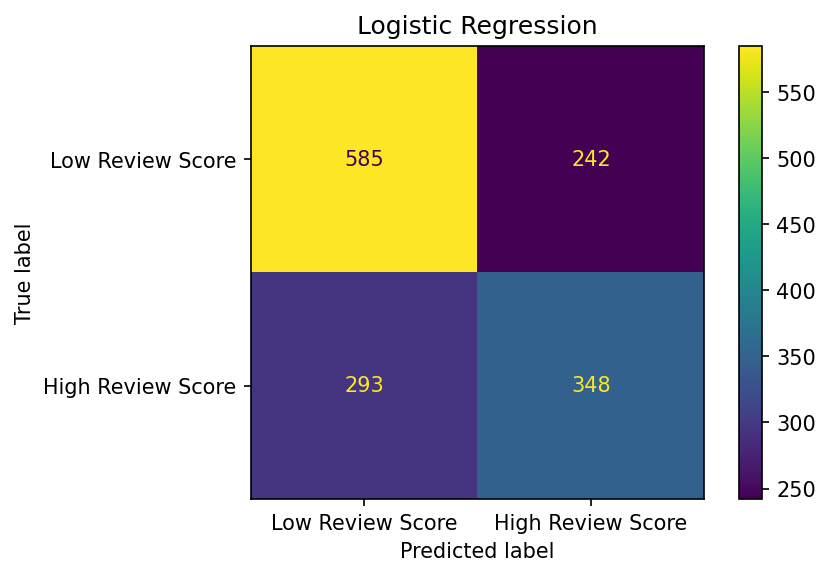

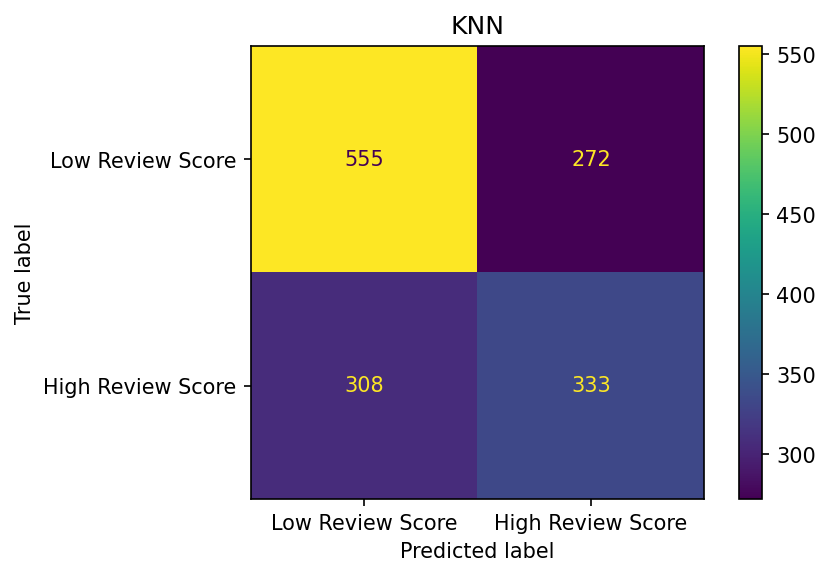

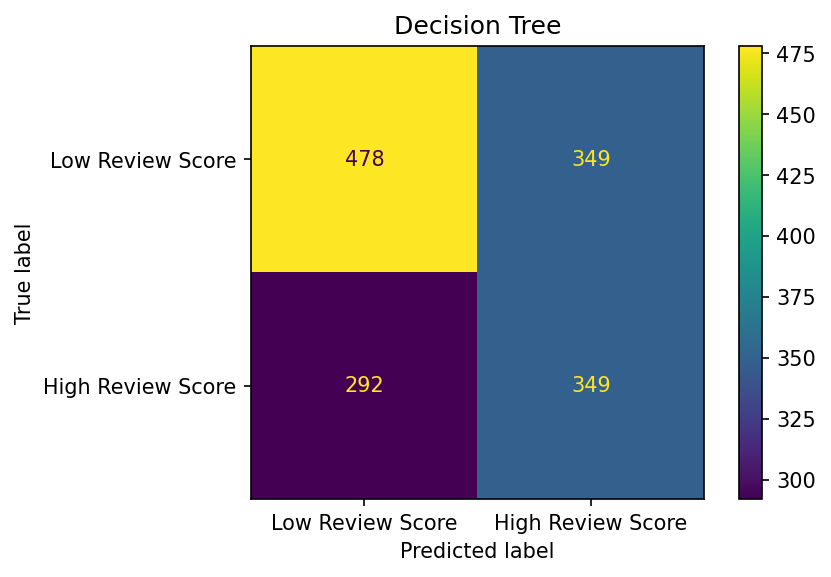

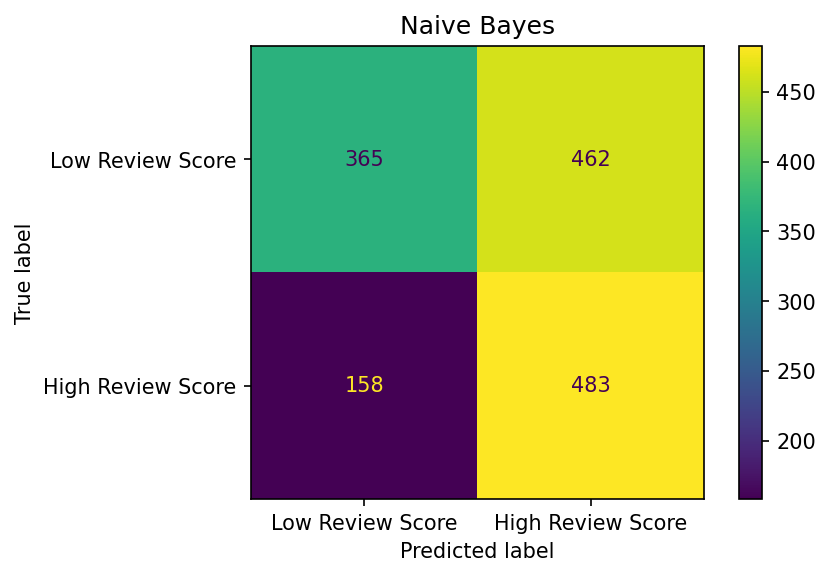

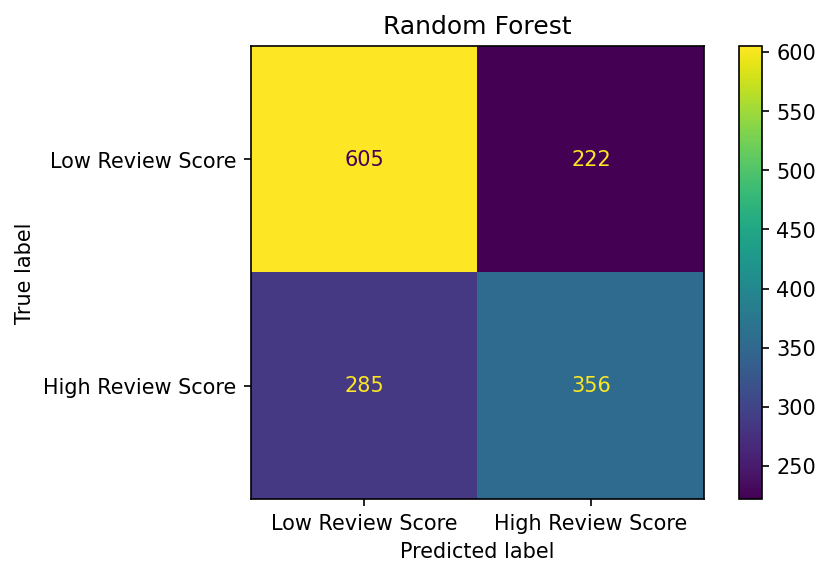

In [13]:
for name, cls in classifiers.items():
    print(name)
    pred = cls.predict(X_test)
    print("Accuracy : ", accuracy_score(y_test, pred))
    print("Balanced Accuracy : ", balanced_accuracy_score(y_test, pred))
    print(cm := confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, target_names=target_names))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    disp.ax_.set_title(name)

In [14]:
c = np.logspace(-5, 10, 16, base=2).tolist()
gamma = ["scale", "auto"] # + np.logspace(-15, 3, 19, base=2).tolist()
# classifiers = {
#     "Linear": GridSearchCV(
#         SVC(kernel="linear"), {"gamma": gamma, "C": c}, n_jobs=-1, verbose=2
#     ),
#     "RBF": GridSearchCV(
#         SVC(kernel="rbf"), {"gamma": gamma, "C": c}, n_jobs=-1, verbose=2
#     ),
#     "Polynomial": GridSearchCV(
#         SVC(kernel="poly"),
#         {"degree": list(range(1, 10)), "gamma": gamma, "C": c},
#         n_jobs=-1,
#         verbose=2,
#     ),
#     # the dataset size is too large for sigmoid kernel
#     "Sigmoid": GridSearchCV(
#         SVC(kernel="sigmoid"), {"gamma": gamma, "C": c}, n_jobs=-1, verbose=2
#     ),
# }
classifiers = {
    "Linear": SVC(kernel="linear"),
    "RBF": SVC(kernel="rbf"),
    "Polynomial": SVC(kernel="poly"),
}
for cls in classifiers.keys():
    classifiers[cls].fit(X_train, y_train)
    # print(cls, classifiers[cls].best_params_)

Linear
Accuracy :  0.6246594005449592
Balanced Accuracy :  0.6186232213496521
[[551 276]
 [275 366]]
                   precision    recall  f1-score   support

 Low Review Score       0.67      0.67      0.67       827
High Review Score       0.57      0.57      0.57       641

         accuracy                           0.62      1468
        macro avg       0.62      0.62      0.62      1468
     weighted avg       0.62      0.62      0.62      1468

RBF
Accuracy :  0.638283378746594
Balanced Accuracy :  0.6329957914156953
[[558 269]
 [262 379]]
                   precision    recall  f1-score   support

 Low Review Score       0.68      0.67      0.68       827
High Review Score       0.58      0.59      0.59       641

         accuracy                           0.64      1468
        macro avg       0.63      0.63      0.63      1468
     weighted avg       0.64      0.64      0.64      1468

Polynomial
Accuracy :  0.6273841961852861
Balanced Accuracy :  0.6182346205577365
[[571 

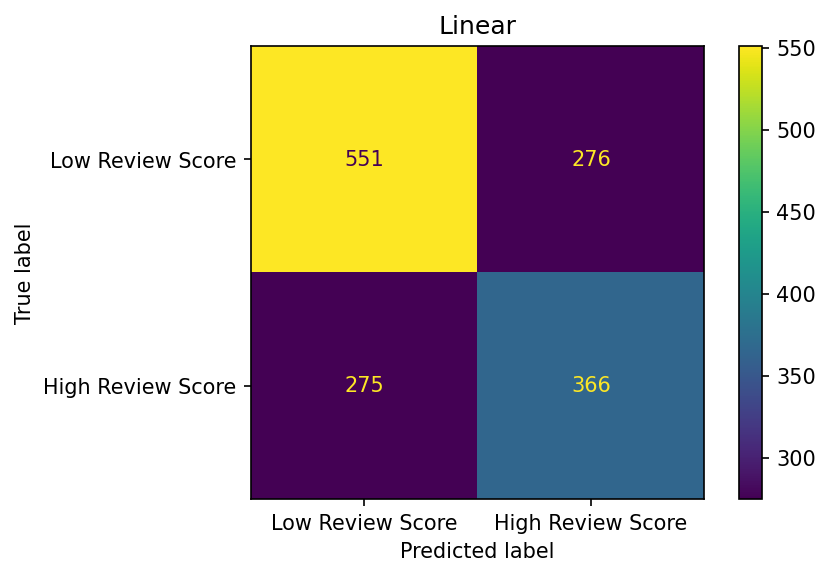

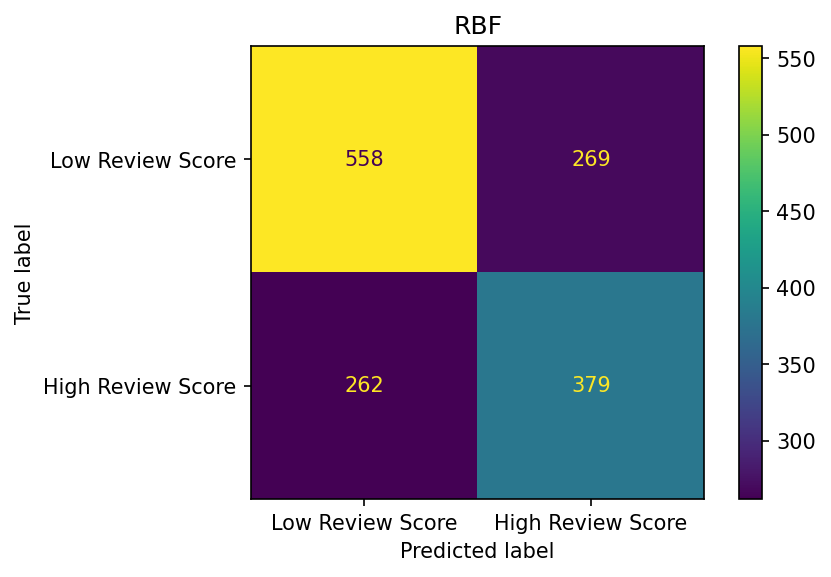

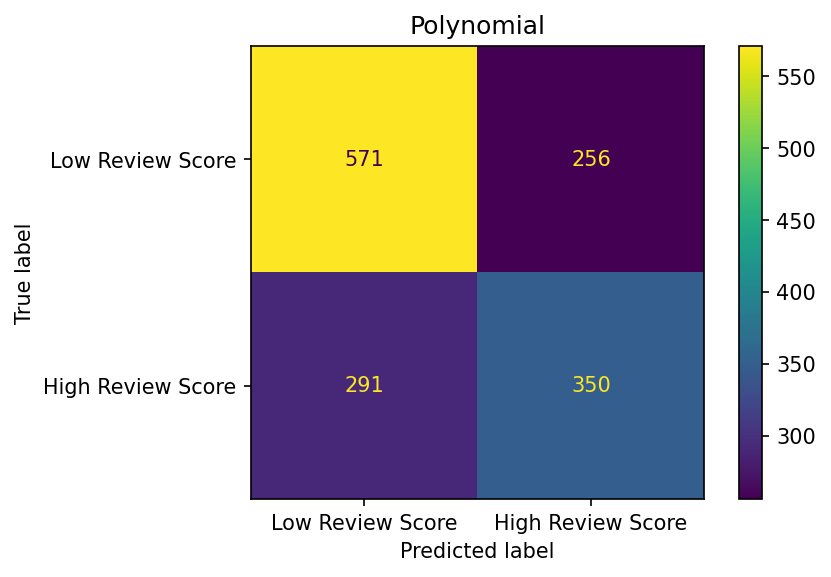

In [15]:
for name, cls in classifiers.items():
    print(name)
    pred = cls.predict(X_test)
    print("Accuracy : ", accuracy_score(y_test, pred))
    print("Balanced Accuracy : ", balanced_accuracy_score(y_test, pred))
    print(cm := confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, target_names=target_names))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    disp.ax_.set_title(name)